1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [2]:
N=1000
x1=np.random.normal(0,1,N)
x2=x1+np.random.normal(0,3,N)
x3=2*x1+x2
A=np.array([x1, x2, x3])
cov = np.cov(A)

values, V = la.eig(cov)
values = np.real_if_close(values)
#print("shapes: cov =", cov.shape, "eigenvalues:", values.shape, "eingenvectors:", vectors.shape, '\n')
#print("cov:\n", cov, '\n')
print("eigenvalues:\n", values, '\n')
print("eigenvectors:\n", V, '\n')

U, s, Vt = la.svd(A)
#swap second and third columns
U[:, [1, 2]] = U[:, [2, 1]]
s[[1, 2]] = s[[2, 1]]
#print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum^2/(N-1) (eigenvalues):\n", s**2/(N-1), '\n')
print("U (eigenvectors):\n", U, '\n')
#print("V:\n", V, '\n')

eigenvalues:
 [ 2.57276642e+01 -1.92118834e-15  1.83685134e+00] 

eigenvectors:
 [[-0.11849111 -0.81649658  0.56506034]
 [-0.57356365 -0.40824829 -0.71018172]
 [-0.81054586  0.40824829  0.41993897]] 

Spectrum^2/(N-1) (eigenvalues):
 [2.57399879e+01 5.26934093e-30 1.84416668e+00] 

U (eigenvectors):
 [[-0.11871564 -0.81649658  0.56501321]
 [-0.57328139 -0.40824829 -0.71040959]
 [-0.81071268  0.40824829  0.41961684]] 



In [3]:
#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system 
#so that at least 99% of the total variability is retained

p_component = values/values.sum()
p_component.sort()
p_component=p_component[::-1]
print("Percent of variability, principal component:", p_component[0]*100)
print("Percent of variability, two components:", (p_component[0]+p_component[1])*100)

Percent of variability, principal component: 93.33617403890038
Percent of variability, two components: 100.0


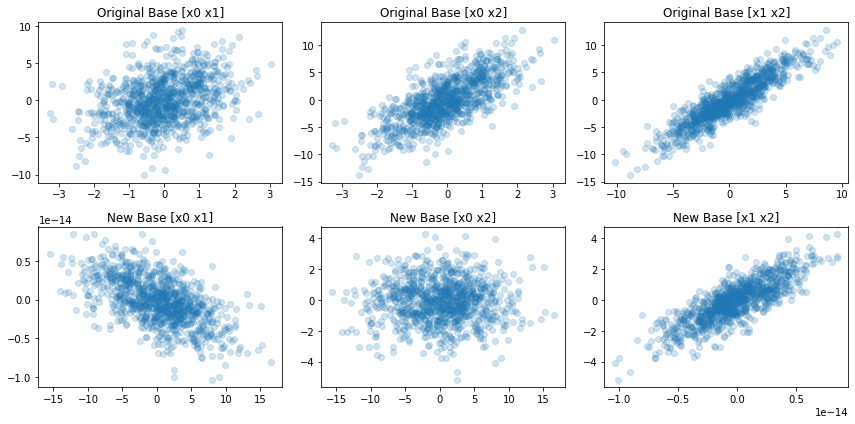

In [4]:
# Redefine the data according to the new basis from the PCA
Xp = np.dot(V.T, A)

# Plot
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 6))

[[ax1_1, ax1_2, ax1_3],[ax2_1, ax2_2, ax2_3]] = axes

ax1_1.scatter(A[0,:], A[1,:], alpha=0.2)
ax1_1.set_title('Original Base [x0 x1]')
ax1_2.scatter(A[0,:], A[2,:], alpha=0.2)
ax1_2.set_title('Original Base [x0 x2]')
ax1_3.scatter(A[1,:], A[2,:], alpha=0.2)
ax1_3.set_title('Original Base [x1 x2]')

ax2_1.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax2_1.set_title('New Base [x0 x1]')
ax2_2.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax2_2.set_title('New Base [x0 x2]')
ax2_3.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
ax2_3.set_title('New Base [x1 x2]')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [5]:
noise = np.random.normal(loc=0, scale=1/20, size=(3, N, 10))

A_noised = A + np.sum(noise, axis = 2)

cov_noised = np.cov(A_noised)

values_n, V_n = la.eig(cov_noised)
values_n = np.real_if_close(values_n)
#print("shapes: cov =", cov.shape, "eigenvalues:", values.shape, "eingenvectors:", vectors.shape, '\n')
#print("cov:\n", cov, '\n')
print("eigenvalues:\n", values_n, '\n')
print("eigenvectors:\n", V_n, '\n')

U_n, s_n, Vt_n = la.svd(A_noised)
#swap second and third columns
U_n[:, [1, 2]] = U_n[:, [2, 1]]
s_n[[1, 2]] = s_n[[2, 1]]
#print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum^2/(N-1) (eigenvalues):\n", s_n**2/(N-1), '\n')
print("U (eigenvectors):\n", U_n, '\n')
#print("V:\n", V, '\n')

eigenvalues:
 [25.76919208  0.02628705  1.86835506] 

eigenvectors:
 [[-0.11974599 -0.81452486  0.56763558]
 [-0.57219826 -0.41061544 -0.70991838]
 [-0.8113261   0.40980997  0.41690016]] 

Spectrum^2/(N-1) (eigenvalues):
 [25.78234277  0.02628734  1.8743674 ] 

U (eigenvectors):
 [[-0.11995908 -0.81451173  0.56760942]
 [-0.57193513 -0.41063013 -0.71012189]
 [-0.81148014  0.40982134  0.41658906]] 



In [6]:
p_component_n = values_n/values_n.sum()
p_component_n.sort()
p_component_n=p_component_n[::-1]
print("Percent of variability, principal component:", p_component_n[0]*100)
print("Percent of variability, two components:", (p_component_n[0]+p_component_n[1])*100)

Percent of variability, principal component: 93.15119481824948
Percent of variability, two components: 99.9049768230786


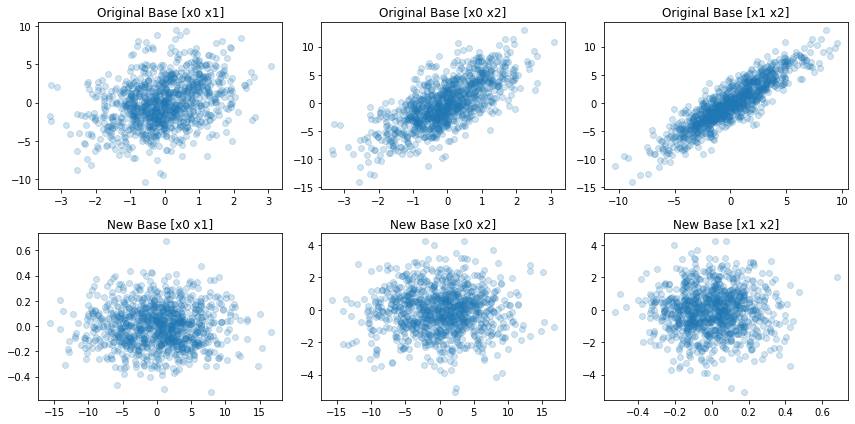

In [7]:
Xp_n = np.dot(V_n.T, A_noised)

# Plot
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 6))

[[ax1_1, ax1_2, ax1_3],[ax2_1, ax2_2, ax2_3]] = axes

ax1_1.scatter(A_noised[0,:], A_noised[1,:], alpha=0.2)
ax1_1.set_title('Original Base [x0 x1]')
ax1_2.scatter(A_noised[0,:], A_noised[2,:], alpha=0.2)
ax1_2.set_title('Original Base [x0 x2]')
ax1_3.scatter(A_noised[1,:], A_noised[2,:], alpha=0.2)
ax1_3.set_title('Original Base [x1 x2]')

ax2_1.scatter(Xp_n[0,:], Xp_n[1,:], alpha=0.2)
ax2_1.set_title('New Base [x0 x1]')
#axes[1,0].set_xlim(-5,5)
ax2_2.scatter(Xp_n[0,:], Xp_n[2,:], alpha=0.2)
ax2_2.set_title('New Base [x0 x2]')
ax2_3.scatter(Xp_n[1,:], Xp_n[2,:], alpha=0.2)
ax2_3.set_title('New Base [x1 x2]')

plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [8]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [9]:
import pandas as pd

filename = 'data/magic04.data'
data = pd.read_csv(filename, header=None)

A = data.to_numpy()
A = A[0:-1,0:-1]
A = np.asarray(A,dtype='float32')

A = A.T
cov = np.cov(A)

values, V  = la.eig(cov) 
values = np.real_if_close(values)

Xp = np.dot(V.T, A) 

p_component = values/values.sum()
for i in range(len(p_component)):
    print("By selecting the component "+ str(i)+", we retain %.9f%% of the total variability" % (100*p_component[i]))

tot_var=0
num_component=0
while tot_var<=0.99:
    tot_var+=p_component[num_component]
    num_component+=1
print('\n We can reduce the dimensionality from 10 to '+ str(num_component)+ ' so that at least 99% of the total variability is retained.')

By selecting the component 0, we retain 61.332984809% of the total variability
By selecting the component 1, we retain 18.474638434% of the total variability
By selecting the component 2, we retain 10.851345044% of the total variability
By selecting the component 3, we retain 4.264804020% of the total variability
By selecting the component 4, we retain 2.669181064% of the total variability
By selecting the component 5, we retain 2.009616840% of the total variability
By selecting the component 6, we retain 0.396857414% of the total variability
By selecting the component 7, we retain 0.000472486% of the total variability
By selecting the component 8, we retain 0.000096272% of the total variability
By selecting the component 9, we retain 0.000003618% of the total variability

 We can reduce the dimensionality from 10 to 6 so that at least 99% of the total variability is retained.
